# **Importing and preparing data**

In [1]:
from google.colab import drive

In [2]:
import pickle

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [4]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

In [6]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
data_df.drop("customerID",axis =1, inplace = True)

**Converting String Numeric types into only numeric types**


In [10]:
for i in data_df.columns:
  unique_values = data_df[i].unique()
  print(i, unique_values)

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [11]:
numeric_category = data_df["SeniorCitizen"]

In [12]:
numeric_objects =['TotalCharges']

#converting numeric string into numeric values
for i in numeric_objects:
  data_df[i] = pd.to_numeric(data_df[i], errors='coerce')


In [13]:
numeric_data = data_df.copy().select_dtypes(exclude="object").drop("SeniorCitizen", axis = 1)
non_numeric_data = data_df.copy().select_dtypes(include="object")



**Displaying Numeric and Non-numeric features**


In [14]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [15]:
non_numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


# **Encoding Non-numeric values**

In [16]:
encoders = {}

In [17]:
for i in non_numeric_data.columns:
    le = LabelEncoder()
    non_numeric_data[i]= le.fit_transform(non_numeric_data[i])
    encoders[i] = le

In [18]:
non_numeric_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# **Imputing and Scaling numeric values**

In [19]:
imputer = SimpleImputer(strategy='mean')

imputed_data = imputer.fit_transform(numeric_data[["TotalCharges"]])
imputed_series = pd.Series(imputed_data.squeeze(), name="TotalCharges")

numeric_data["TotalCharges"] = imputed_series

In [20]:
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

pickling Scaler object

In [21]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [22]:
numeric_data = pd.DataFrame(scaled_numeric_data, columns= numeric_data.columns)

In [23]:
data = pd.concat([numeric_data, numeric_category, non_numeric_data], axis = 1)

In [24]:
data.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.066327,-0.259629,-0.173876,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.236724,-0.362660,-0.960399,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.514251,-0.746535,-0.195400,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# **EDA for feature selection**

In [25]:
data.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,-2.421273e-17,-6.406285e-17,8.070910e-17,0.162147,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,0.368612,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,-1.318165e+00,-1.545860e+00,-9.998503e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.516817e-01,-9.725399e-01,-8.305558e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.372744e-01,1.857327e-01,-3.897629e-01,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,9.214551e-01,8.338335e-01,6.637555e-01,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.613701e+00,1.794352e+00,2.826469e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


# **Profile Exploration**

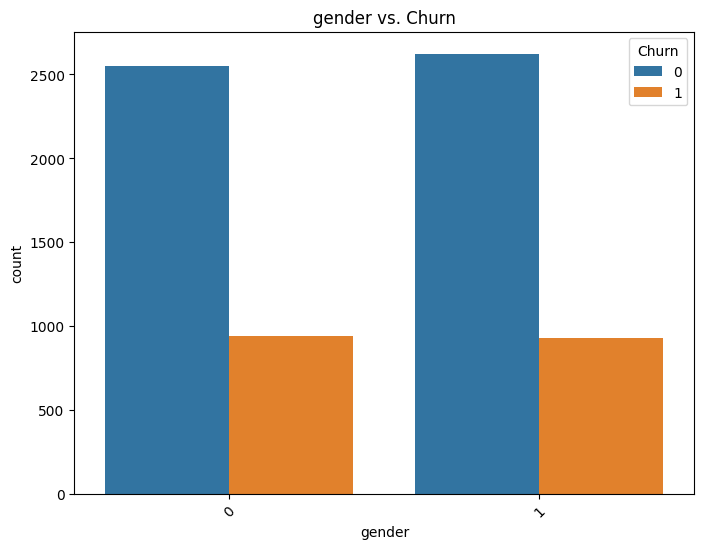

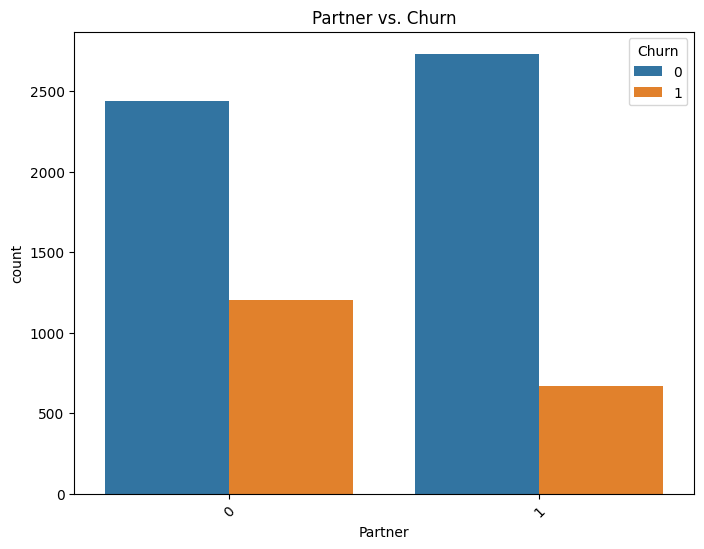

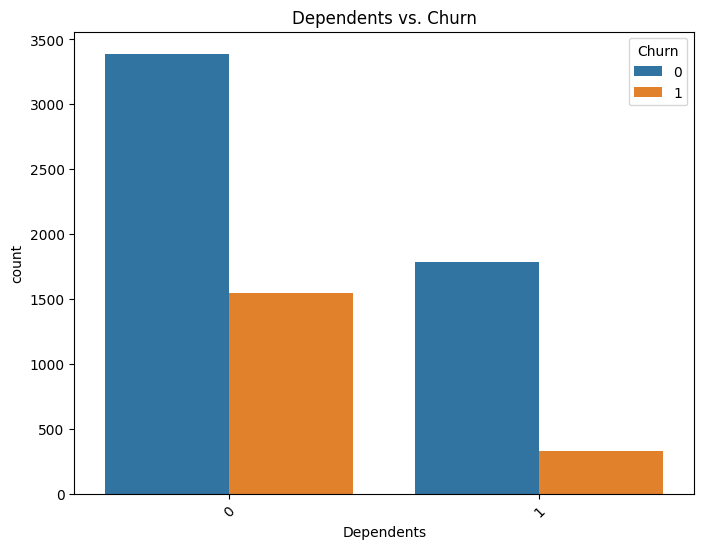

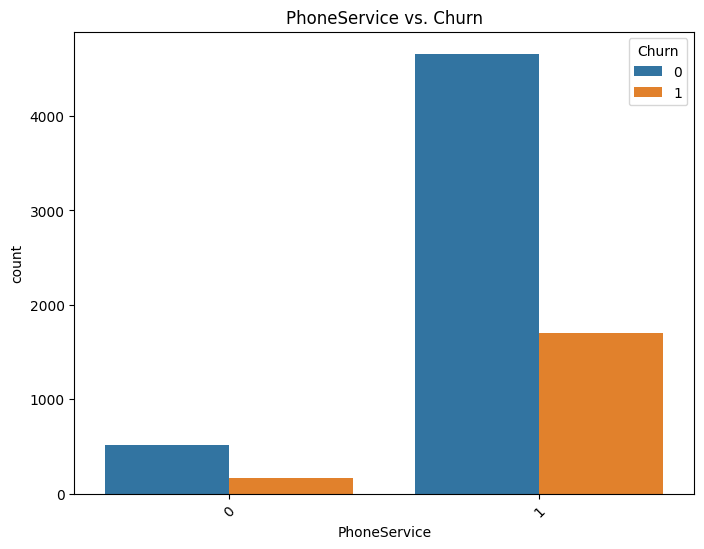

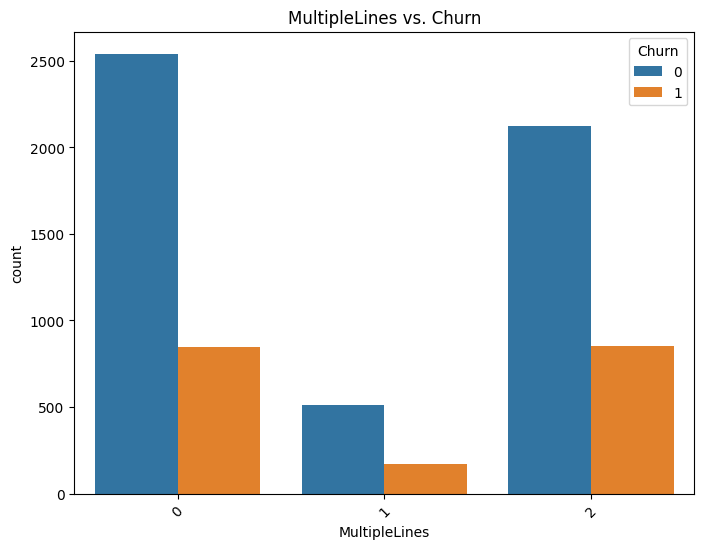

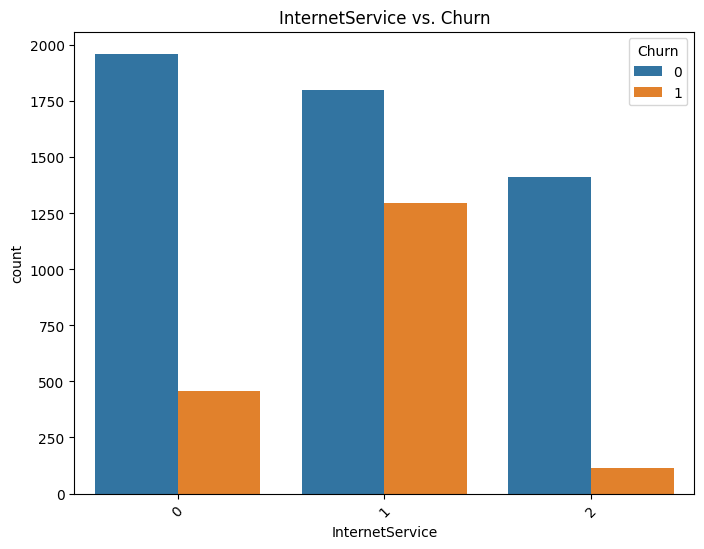

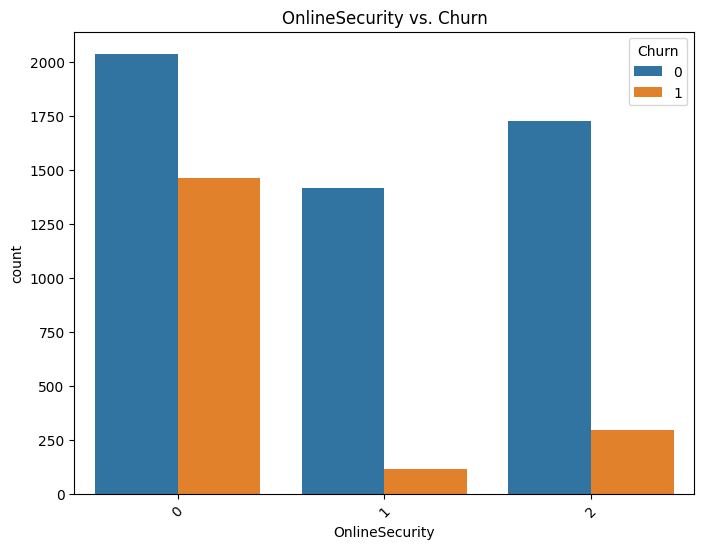

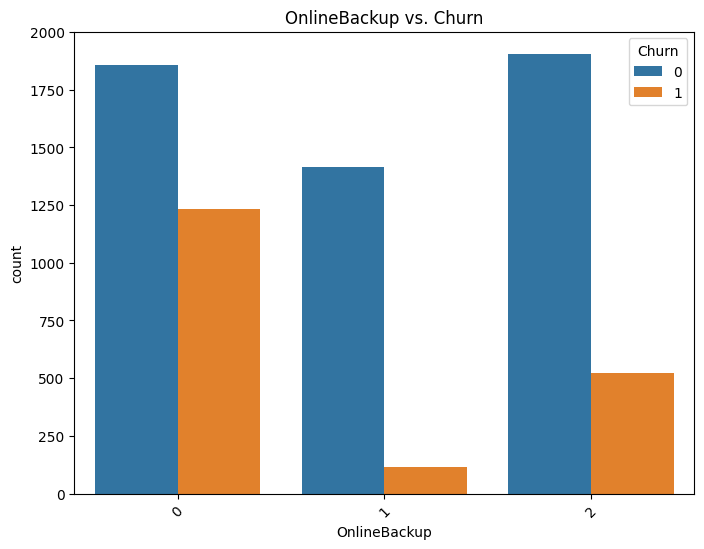

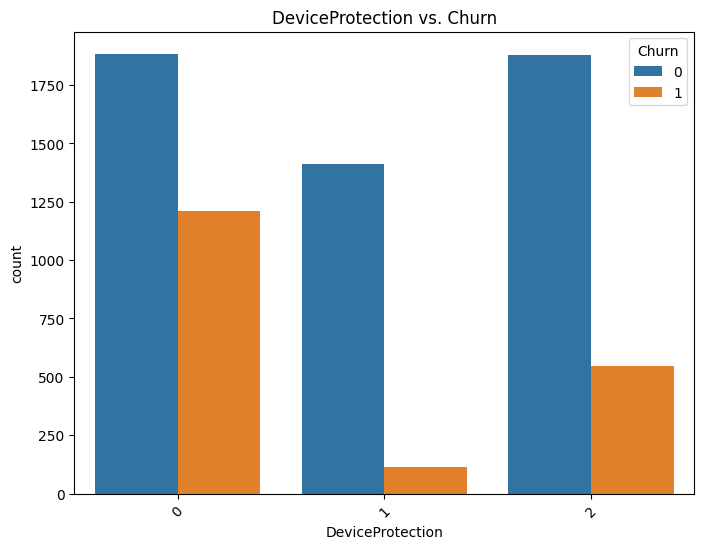

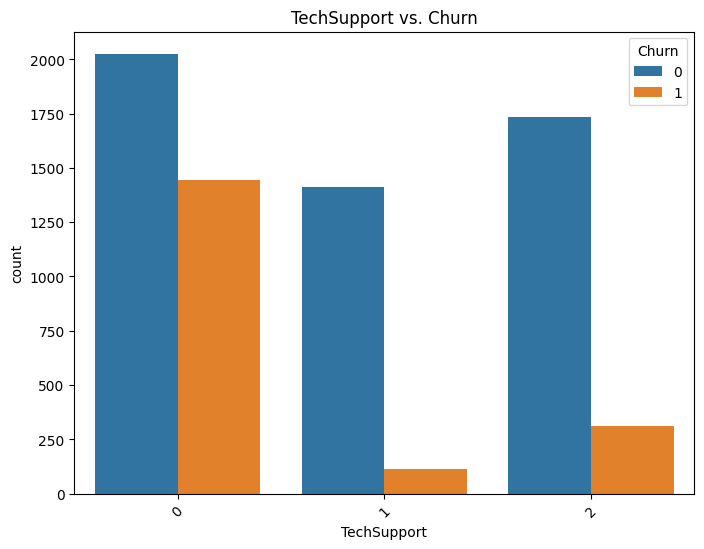

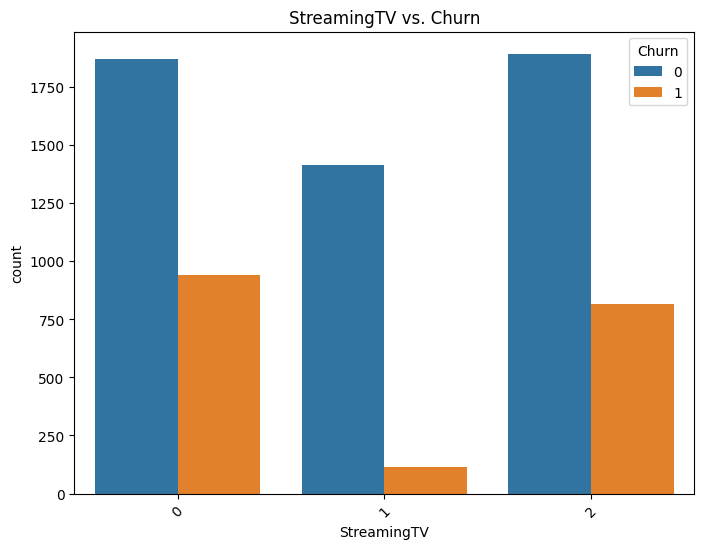

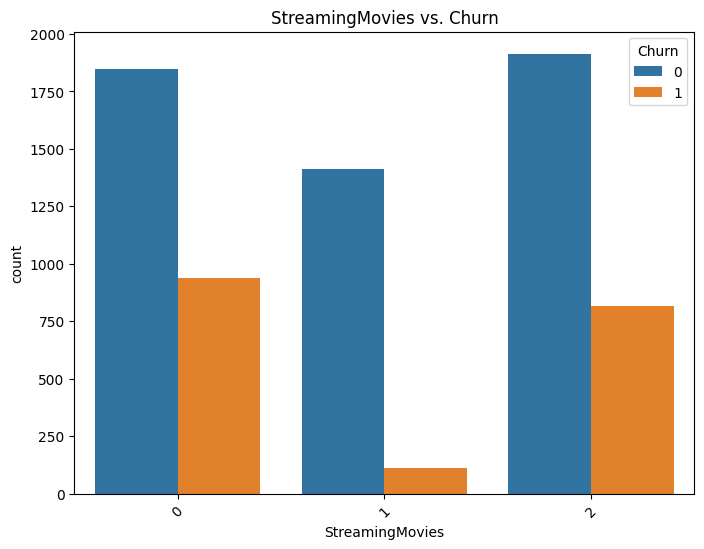

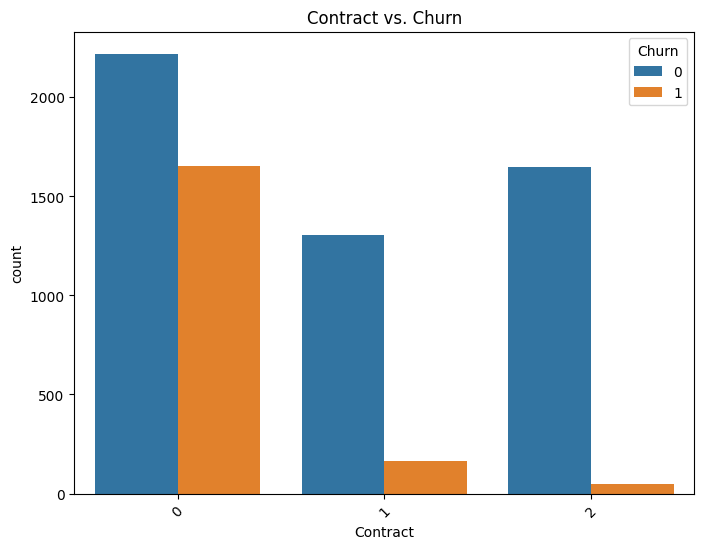

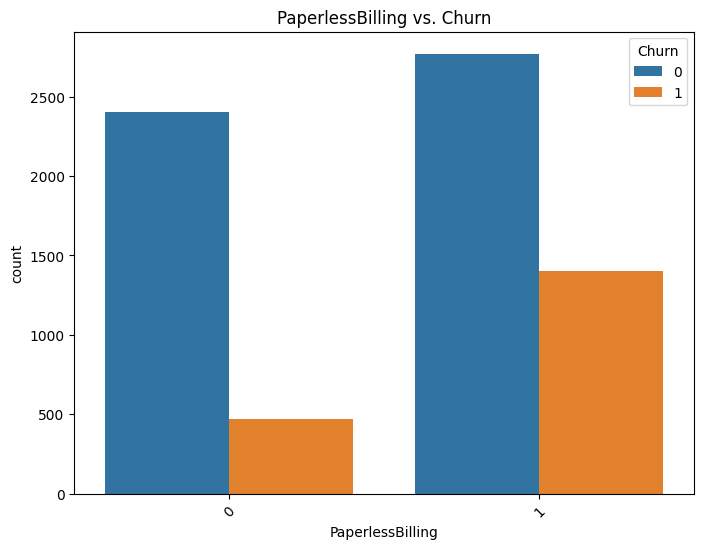

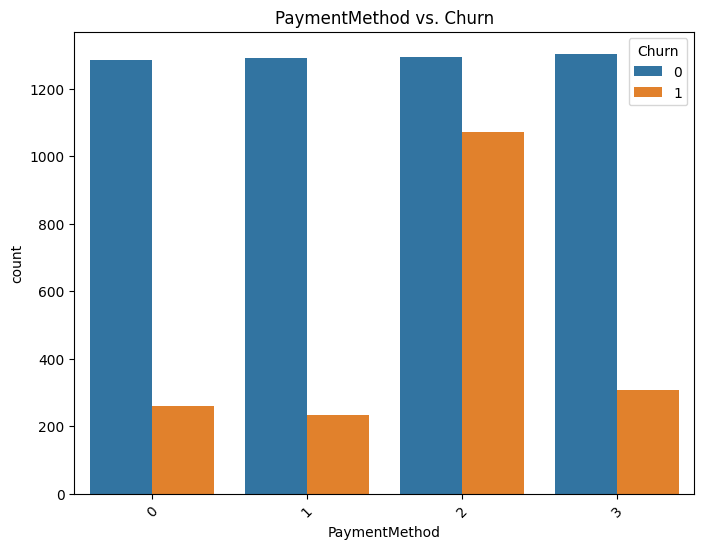

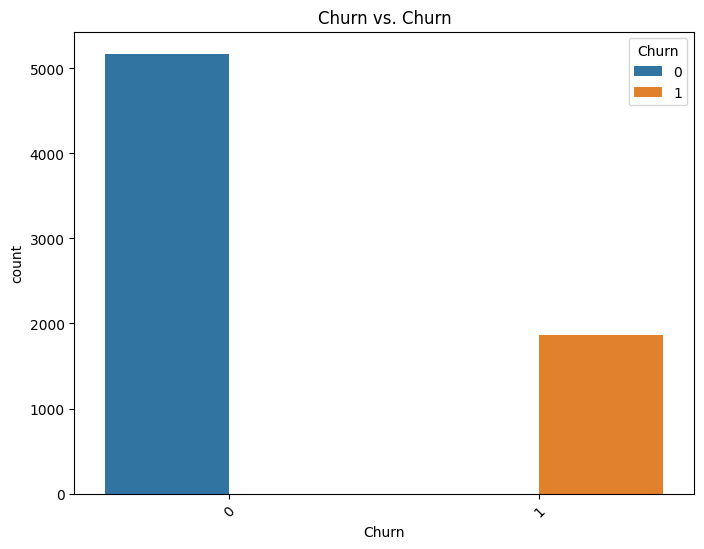

In [26]:

for feature in non_numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'{feature} vs. Churn')
    plt.xticks(rotation=45)
    plt.show()


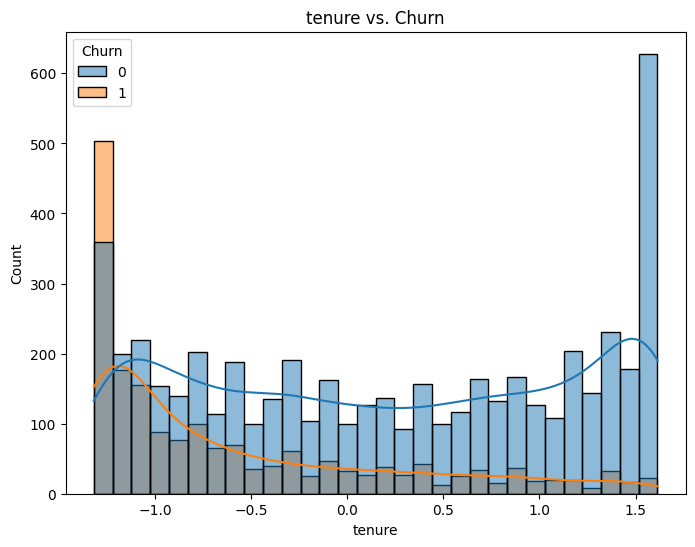

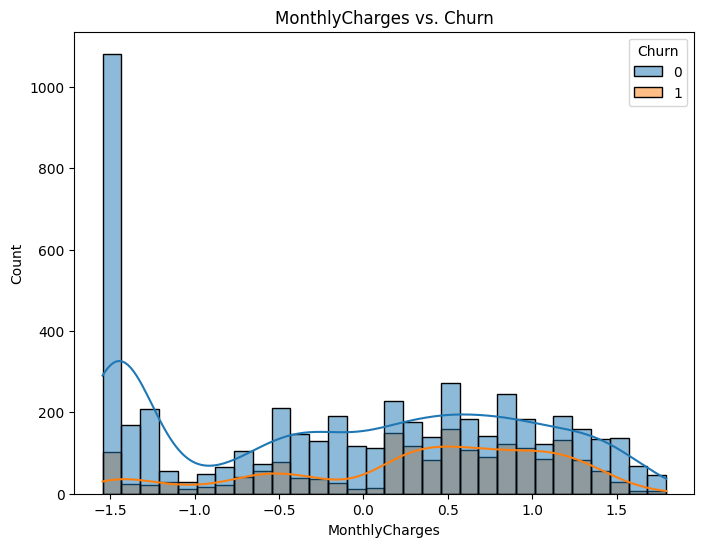

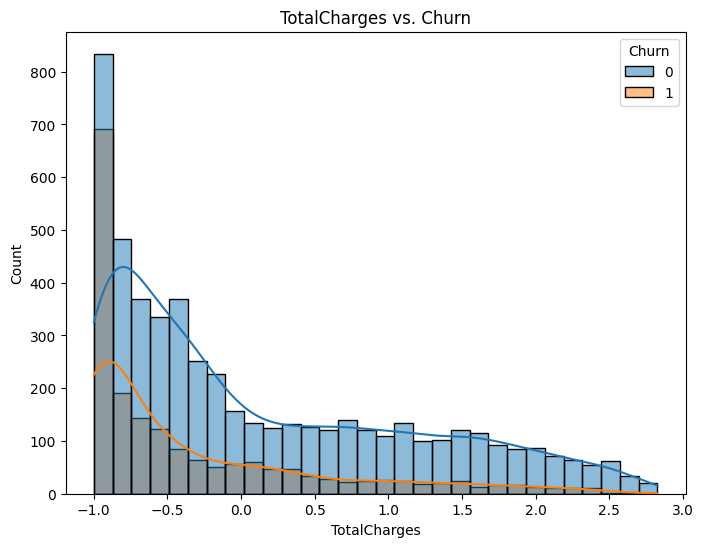

In [27]:
for feature in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True, hue='Churn', bins=30)
    plt.title(f'{feature} vs. Churn')
    plt.show()

Tree based feature selection

In [28]:
X = data.copy().drop("Churn", axis=1)
y = data["Churn"]

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# feature importances
feature_importances = model.feature_importances_

In [33]:
feature_names = X.columns
feature_importance_pairs = list(zip(feature_names, feature_importances))


In [34]:
feature_importance_pairs

[('tenure', 0.16593898988351785),
 ('MonthlyCharges', 0.18344674230961755),
 ('TotalCharges', 0.18428426427230257),
 ('SeniorCitizen', 0.021160735879546713),
 ('gender', 0.028195212782373316),
 ('Partner', 0.023362717946723822),
 ('Dependents', 0.02060964704044253),
 ('PhoneService', 0.0053824499132736035),
 ('MultipleLines', 0.022645188014482665),
 ('InternetService', 0.028860707251654797),
 ('OnlineSecurity', 0.041330162078272566),
 ('OnlineBackup', 0.02832134630346742),
 ('DeviceProtection', 0.02348753473142544),
 ('TechSupport', 0.03566574984710051),
 ('StreamingTV', 0.016804284776517978),
 ('StreamingMovies', 0.017338068496472406),
 ('Contract', 0.07416053984332022),
 ('PaperlessBilling', 0.026999617128166918),
 ('PaymentMethod', 0.052006041501321126)]

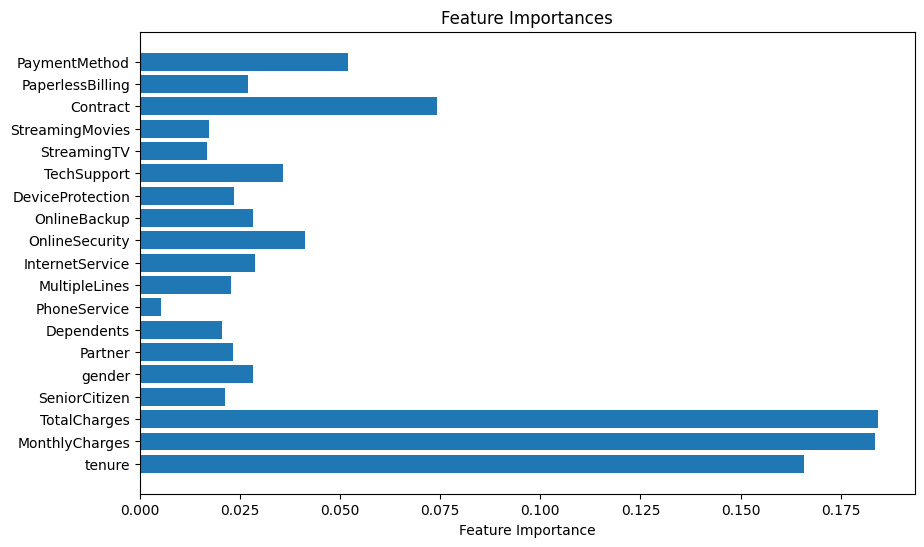

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


RFE approach

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
n_folds = 10

# RFE Cross-Validator
rfecv = RFECV(
    estimator = rfc,
    step=1,
    cv=StratifiedKFold(n_folds),
    scoring='accuracy'
)

# RFE cross-validator
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [39]:
y_pred = rfecv.predict(X_test)

# Measure accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8017037387600567

In [40]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_


In [41]:
rfecv.n_features_

18

In [42]:
selected_features = X.columns[support_mask]

In [43]:

selected_features


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'gender',
       'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

# **Final Features**

In [44]:
final_data = data[selected_features]
X = final_data.copy()


In [45]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

In [46]:
# X_test, X_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [47]:
# from imblearn.over_sampling import RandomOverSampler

# # Initialize the RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# # Apply random oversampling to the training data
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   float64
 1   MonthlyCharges    7043 non-null   float64
 2   TotalCharges      7043 non-null   float64
 3   SeniorCitizen     7043 non-null   int64  
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [50]:
selected_categorical_features = selected_features

selected_label_encoders = {}

for feature in selected_categorical_features:
    if feature in encoders:
        selected_label_encoders[feature] = encoders[feature]

# Update the original dictionary with only the selected label encoders
encoders = selected_label_encoders

Pickling the label encoders

In [51]:
with open('label_encoders.pkl', 'wb') as label_encoder_file:
    pickle.dump(encoders, label_encoder_file)

# **Cross validation / Grid Search**

In [184]:
!pip install tensorflow scikeras scikit-learn

In [185]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

from keras.optimizers import Adam, SGD, RMSprop

In [186]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# # Initialize the RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# # Apply random oversampling to the training data
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)



In [187]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [188]:
# Print the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [4656 1682]
Resampled class distribution: [4656 4656]


In [189]:
def create_model(dropout_rate, weight_constraint, activation):

  inputs = tf.keras.Input(shape=(X_train_resampled.shape[1],))

  input = tf.keras.layers.Dense(32, activation=activation)(inputs)

  x= tf.keras.layers.Dropout(dropout_rate)(input)

  second=tf.keras.layers.Dense(24, activation=activation)(x)

  x= tf.keras.layers.Dropout(dropout_rate)(second)

  third=tf.keras.layers.Dense(12, activation=activation)(x)

  outputs = tf.keras.layers.Dense(1, activation='sigmoid')(third)

  # Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=0.001), metrics=['accuracy'])
  return m


In [190]:
# Create KerasClassifier for use with GridSearchCV
keras_model = KerasClassifier(model=create_model,
                              epochs=30,
                              batch_size=10,
                              validation_split = 0.1,
                              verbose=0)

dropout_rate = [0.4]
weight_constraint = [5.0]
activation = ['relu']

param_grid = dict(model__dropout_rate=dropout_rate,
                  model__weight_constraint=weight_constraint,
                  model__activation=activation)

In [191]:
# Create the grid search
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=outer_cv, scoring='accuracy')

result = grid_search.fit(X_train_resampled, y_train_resampled )

best_model = result.best_estimator_

In [192]:
from sklearn.metrics import classification_report

In [193]:
best_model= grid_search.best_estimator_

In [194]:
# Train the final model on the entire training set with the best hyperparameters
print("The best estimator:",best_model, "\n")

best_model.fit(X_train_resampled, y_train_resampled,epochs=30, batch_size = 10, verbose=0)

# Evaluate the model and obtain predicted probabilities
y_pred = best_model.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)

y_pred = np.round(best_model.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

The best estimator: KerasClassifier(
	model=<function create_model at 0x78c972de69e0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.4
	model__weight_constraint=5.0
	class_weight=None
) 

AUC: 0.7401

CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       518
           1       0.52      0.73      0.60       187

    accuracy                           0.75       705
   macro avg       0.70      0.74      0.71       705
weighted avg       0.79      0.75      0.76       705



In [195]:
# # Save the trained model using pickle
# with open('model_mlp_gdcvl.pkl', 'wb') as model_file:
#     pickle.dump(best_model, model_file)

# **Hyper Parameter tuning using the Keras Tune**r

In [161]:
!pip install keras-tuner

In [162]:
# Oversampling

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)


# # Initialize the RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# # Apply random oversampling to the training data
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

X_test, X_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [163]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [164]:
import keras_tuner
from tensorflow import keras

In [165]:
def build_model(hp):
  inputs = Input(shape=(X_train_resampled.shape[1],))
  x = inputs

  # Tune the number of hidden layers and units
  for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=3)):
      x = Dense(units=hp.Int(f'units_{i}', min_value=12, max_value= 36, step=12),
                activation=hp.Choice(f'activation_{i}', values=['relu','tanh']))(x)
      x = Dropout(rate= 0.5)(x)

  outputs = Dense(1, activation='sigmoid')(x)

  # Tune the learning rate

  m = keras.Model(inputs=inputs, outputs=outputs)

  m.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return m

In [166]:
build_model(keras_tuner.HyperParameters())

In [167]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=30,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

Reloading Tuner from tuning_dir/samples/tuner0.json


In [168]:
tuner.search(X_train_resampled, y_train_resampled, epochs=30 ,validation_data=(X_val, y_val))

In [169]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0089 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 36
activation_0: tanh
units_1: 24
activation_1: tanh
units_2: 24
activation_2: relu
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8170212507247925

Trial 0050 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 24
activation_0: tanh
units_1: 24
activation_1: relu
units_2: 24
activation_2: relu
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0048
Score: 0.8141843676567078

Trial 0085 summary
Hyperparameters:
num_hidden_layers: 2
units_0: 36
activation_0: tanh
units_1: 24
activation_1: tanh
units_2: 24
activation_2: relu
tuner/epochs: 30
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8113475441932678

Trial 0072 summary
Hyperparameters:
num_hidden_layers: 2
units_0: 24
activation_0: tanh
units_1: 36
activation_1:

In [170]:
best_model = tuner.get_best_models(num_models=2)[0]

In [171]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 36)                684       
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 37        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The best model

In [172]:
best_model.fit(X_train_resampled, y_train_resampled, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
104/104 [==============================] - 1s 5ms/step - loss: 0.5334 - accuracy: 0.7314 - val_loss: 0.7626 - val_accuracy: 0.6165
Epoch 2/2
104/104 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7343 - val_loss: 0.7036 - val_accuracy: 0.6588


In [173]:
test_accuracy = best_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

22/22 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8210
Test Accuracy: 0.8210


In [174]:
y_pred =best_model.predict(X_test)

auc = metrics.roc_auc_score(y_test, y_pred)

print(f'AUC: {auc}')

22/22 [==============================] - 0s 2ms/step
AUC: 0.8472781058968338


In [175]:
best_model.save('mpl_model_kt.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [176]:
# # Save the trained model using pickle
# with open('keras_mlp_kt_model.pkl', 'wb') as model_file:
#     pickle.dump(best_model, model_file)

# **Final Model**

In [179]:
# Oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)


# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

X_test, X_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [180]:
import keras
from keras.models import Model
from keras.layers import Input, Dense,Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical


#Input layer
input_layer = Input(shape=(X_train_resampled.shape[1],))

#Hidden layer
hidden_layer_1 = Dense(36, activation='tanh')(input_layer)
x= Dropout(0.2)(hidden_layer_1)

hidden_layer_2 = Dense(24, activation='tanh')(x)
x= Dropout(0.2)(hidden_layer_2)

hidden_layer_3 = Dense(24, activation='relu')(x)

#Outputlayer
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

final_model = Model(inputs=input_layer, outputs=output_layer)

final_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = final_model.fit(X_train_resampled, y_train_resampled, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
292/292 [==============================] - 2s 4ms/step - loss: 0.7027 - accuracy: 0.5480 - val_loss: 0.6249 - val_accuracy: 0.7110
Epoch 2/30
292/292 [==============================] - 1s 3ms/step - loss: 0.6100 - accuracy: 0.6823 - val_loss: 0.5330 - val_accuracy: 0.7705
Epoch 3/30
292/292 [==============================] - 1s 3ms/step - loss: 0.5611 - accuracy: 0.7211 - val_loss: 0.4841 - val_accuracy: 0.7734
Epoch 4/30
292/292 [==============================] - 1s 3ms/step - loss: 0.5442 - accuracy: 0.7315 - val_loss: 0.4668 - val_accuracy: 0.7847
Epoch 5/30
292/292 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.7412 - val_loss: 0.4697 - val_accuracy: 0.7790
Epoch 6/30
292/292 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.7469 - val_loss: 0.4594 - val_accuracy: 0.7847
Epoch 7/30
292/292 [==============================] - 1s 3ms/step - loss: 0.5230 - accuracy: 0.7413 - val_loss: 0.4563 - val_accuracy: 0.7819
Epoch 

In [181]:
evaluation_result = final_model.evaluate(X_test, y_test)

# Print the evaluation metrics
print(f"Test Loss: {evaluation_result[0]}")
print(f"Test Accuracy: {evaluation_result[1]}")

11/11 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7614
Test Loss: 0.4646182954311371
Test Accuracy: 0.7613636255264282


In [182]:
final_model.save('mlp_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [183]:
y_pred =best_model.predict(X_test)

auc = metrics.roc_auc_score(y_test, y_pred)

print(f'AUC: {auc}')

11/11 [==============================] - 0s 2ms/step
AUC: 0.8601980998585


# **Dependencies**

In [ ]:
!pip freeze | grep 'numpy\|pandas\|scikit-learn\|tensorflow\|keras'


In [ ]:
!pip freeze | grep 'numpy\|pandas\|scikit-learn\|tensorflow' > requirements.txt
